# Manhattan Crime Data Analysis

Currently, I have included Manhattan crime data for years 2008-2016.
I will Update once I get the 2017 data.

The Following Analysis is over the historic data. I will include Crime Forecasting by next week.

I will be updating the notebook with more text explanation.

In [1]:
## Importing all the required Python Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Import

In [2]:
crimes = pd.read_csv('./NYPD_Complaint_Data_Historic.csv',error_bad_lines=False)
#crimes_2016-17 = pd.read_csv('./crimes_2016-17.csv',error_bad_lines=False)
#crimes = pd.concat([crimes1, crimes_2016-17], ignore_index=False, axis=0)
#del crimes1
#del crimes_2016-17
print('Dataset Shape before cleaning records and drop_duplicate : ')
crimes.info()

Dataset Shape before cleaning records and drop_duplicate : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331760 entries, 0 to 1331759
Data columns (total 24 columns):
CMPLNT_NUM           1331760 non-null int64
CMPLNT_FR_DT         1331618 non-null object
CMPLNT_FR_TM         1331748 non-null object
CMPLNT_TO_DT         966834 non-null object
CMPLNT_TO_TM         967664 non-null object
RPT_DT               1331760 non-null object
KY_CD                1331760 non-null int64
OFNS_DESC            1325627 non-null object
PD_CD                1331100 non-null float64
PD_DESC              1331100 non-null object
CRM_ATPT_CPTD_CD     1331757 non-null object
LAW_CAT_CD           1331760 non-null object
JURIS_DESC           1331760 non-null object
BORO_NM              1331760 non-null object
ADDR_PCT_CD          1331758 non-null float64
LOC_OF_OCCUR_DESC    1046918 non-null object
PREM_TYP_DESC        1320564 non-null object
PARKS_NM             4264 non-null object
HADEVELOPT           5

## Data Cleansing

#### (PENDING)Task: Replace CMPNT_FR_DT with RPT_DT for all missing values

Dataset contains few features with more than 20% missing values. We will drop these columns for now.

In [3]:
#We will not be using following columns for now (primary analysis) 
crimes.drop(['CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM','PD_CD','BORO_NM','LOC_OF_OCCUR_DESC','PARKS_NM', 'HADEVELOPT'], inplace=True, axis=1)
crimes.drop_duplicates(subset=['CMPLNT_NUM'],inplace=True)

## Removing records before 2008 as most of them are incomplete and irregular in time

Moreover, KY_CD is present for all records but offense description is missing which can be filled based on previous key-value pair of KY_CD - OFNS_DESC.

In [4]:
# Including Year and Month Column for time plots 
crimes['Year'] = crimes['RPT_DT'].apply(lambda x: str(x.split()[0].split('/')[2]))
crimes['MonthNo'] = crimes['RPT_DT'].apply(lambda x: str(x.split()[0].split('/')[0]))
monthDict = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes['Month'] = crimes['MonthNo'].apply(lambda x: monthDict[x])
crimes.Year=pd.to_numeric(crimes.Year)


crimes = pd.DataFrame(crimes[crimes['Year'] >= 2008])
crimes.info()

#Fill up missing values for OFNS_DESC based on previous KY_CD - OFNS_DESC Pairs
crimes['OFNS_DESC'] = crimes.groupby('KY_CD')['OFNS_DESC'].fillna(method='ffill')
crimes['OFNS_DESC'] = crimes.groupby(['KY_CD'])['OFNS_DESC'].bfill()

#Remove incomplete records
crimes=crimes.dropna(subset = ['OFNS_DESC','RPT_DT','KY_CD','PREM_TYP_DESC'])

# setting the index to be the date for time respective ploting purpose
crimes.index = pd.DatetimeIndex(crimes.RPT_DT)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071068 entries, 2015-12-31 to 2016-01-01
Data columns (total 19 columns):
CMPLNT_NUM          1071068 non-null int64
CMPLNT_FR_DT        1070979 non-null object
RPT_DT              1071068 non-null object
KY_CD               1071068 non-null int64
OFNS_DESC           1066593 non-null object
PD_DESC             1070587 non-null object
CRM_ATPT_CPTD_CD    1071067 non-null object
LAW_CAT_CD          1071068 non-null object
JURIS_DESC          1071068 non-null object
ADDR_PCT_CD         1071067 non-null float64
PREM_TYP_DESC       1063249 non-null object
X_COORD_CD          1039569 non-null float64
Y_COORD_CD          1039569 non-null float64
Latitude            1039569 non-null float64
Longitude           1039569 non-null float64
Lat_Lon             1039569 non-null object
Year                1071068 non-null int64
MonthNo             1071068 non-null object
Month               1071068 non-null object
dtypes: float64(5), int64(3), obje

KeyboardInterrupt: 

## CLEANSED DATASET 

In [5]:
print(crimes.head())
print('Dataset Shape',crimes.shape)
crimes.info()

            CMPLNT_NUM CMPLNT_FR_DT      RPT_DT  KY_CD  \
2015-12-31   569369778   12/31/2015  12/31/2015    117   
2015-12-31   641637920   12/31/2015  12/31/2015    344   
2015-12-31   608231454   12/31/2015  12/31/2015    235   
2015-12-31   415095955   12/31/2015  12/31/2015    341   
2015-12-31   178090167   12/31/2015  12/31/2015    341   

                               OFNS_DESC                         PD_DESC  \
2015-12-31               DANGEROUS DRUGS  CONTROLLED SUBSTANCE,INTENT TO   
2015-12-31  ASSAULT 3 & RELATED OFFENSES                       ASSAULT 3   
2015-12-31               DANGEROUS DRUGS  CONTROLLED SUBSTANCE, POSSESSI   
2015-12-31                 PETIT LARCENY  LARCENY,PETIT FROM BUILDING,UN   
2015-12-31                 PETIT LARCENY  LARCENY,PETIT FROM BUILDING,UN   

           CRM_ATPT_CPTD_CD   LAW_CAT_CD        JURIS_DESC  ADDR_PCT_CD  \
2015-12-31        COMPLETED       FELONY  N.Y. POLICE DEPT         28.0   
2015-12-31        COMPLETED  MISDEMEANOR  N.

## TYPES OF CRIME
 
How many unique crime categories are available and what is the count for each crime category from 2008-2016?

In [6]:
#Offense categories

# Group by Crime type and calculate count
crime_count = pd.DataFrame(crimes.groupby('OFNS_DESC').size().sort_values(ascending=False).rename('Count').reset_index())
print('\n Total Categories of Crimes::',len(crime_count.index))

# Top 10 crimes categories
print('\n Top 10 categories of frequently occured crimes \n\n',crime_count.head(10))


 Total Categories of Crimes:: 67

 Top 10 categories of frequently occured crimes 

                         OFNS_DESC   Count
0                   PETIT LARCENY  233015
1                   GRAND LARCENY  145982
2                   HARRASSMENT 2  107371
3    ASSAULT 3 & RELATED OFFENSES   89492
4  CRIMINAL MISCHIEF & RELATED OF   81540
5                 DANGEROUS DRUGS   68164
6   OFF. AGNST PUB ORD SENSBLTY &   49112
7                         ROBBERY   31622
8                  FELONY ASSAULT   30006
9                        BURGLARY   28521


As there are many categorical variables, 
for ex: 

'OFNS_DESC' we will select 20 frequetly occured crime categories and all others as one category 'OTHER'

'PREM_TYP_DESC' we will select 20 most frequet crime scenes and all others as one category 'OTHER'

In [7]:
offense_desc = list(crimes['OFNS_DESC'].value_counts()[30:].index)
locations  = list(crimes['PREM_TYP_DESC'].value_counts()[30:].index)
crimes.loc[crimes['PREM_TYP_DESC'].isin(locations) , crimes.columns=='PREM_TYP_DESC'] = 'OTHER'
crimes.loc[crimes['OFNS_DESC'].isin(offense_desc) , crimes.columns=='OFNS_DESC'] = 'OTHER'

#Changing variables to categorical type
crimes['OFNS_DESC']         = pd.Categorical(crimes['OFNS_DESC'])
crimes['PREM_TYP_DESC'] = pd.Categorical(crimes['PREM_TYP_DESC'])

### Ploting the top 20 crimes as barplot

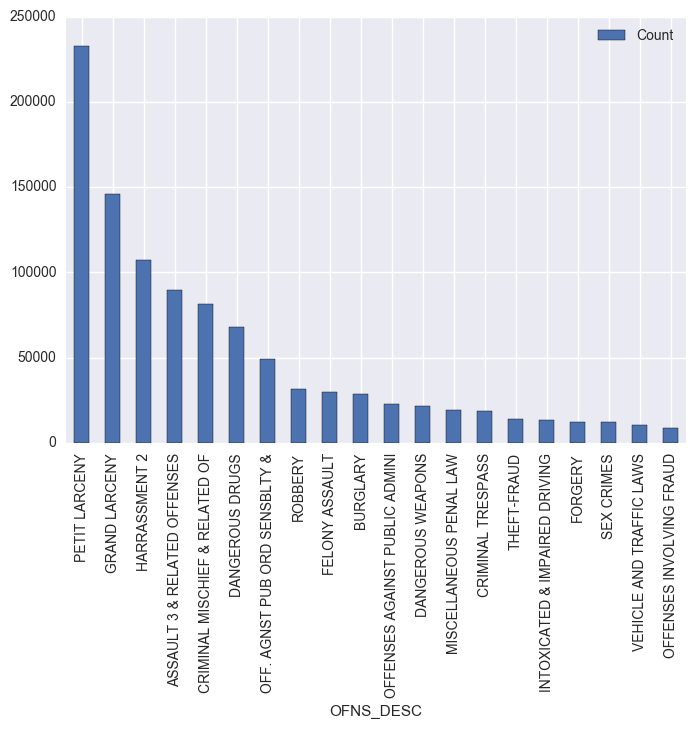

In [8]:
crime_count[:20].plot(x='OFNS_DESC',y='Count',kind='bar')
plt.show()

## Crime by Locations

In [9]:
# Group by Crime Location and calculate count
crime_location = pd.DataFrame(crimes.groupby('PREM_TYP_DESC').size().sort_values(ascending=False).rename('Count').reset_index())
print('\n Total types of crime location::',len(crime_location.index))


 Total types of crime location:: 30


### Top 10 crime location and their counts

In [10]:
print(crime_location.head(10))

                PREM_TYP_DESC   Count
0                      STREET  299917
1      RESIDENCE - APT. HOUSE  194445
2  RESIDENCE - PUBLIC HOUSING  105426
3                       OTHER   63645
4        TRANSIT - NYC SUBWAY   46772
5         COMMERCIAL BUILDING   46607
6                 CHAIN STORE   38000
7            DEPARTMENT STORE   37718
8              BAR/NIGHT CLUB   29950
9            RESTAURANT/DINER   26739


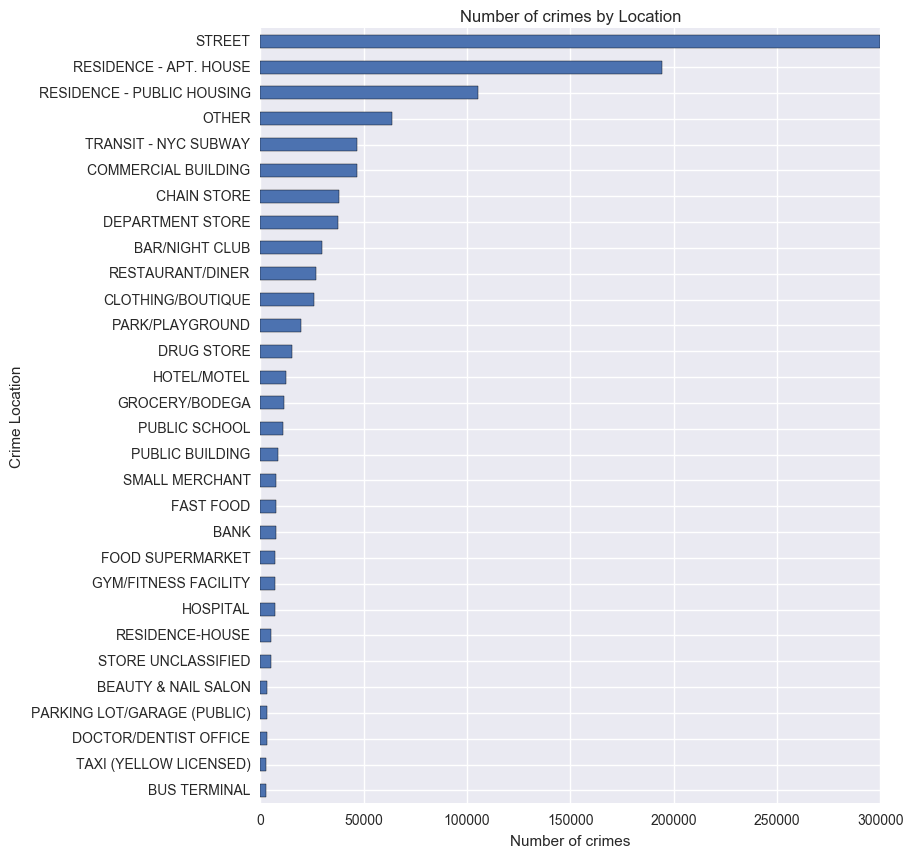

In [11]:
#Ploting 
plt.figure(figsize=(8,10))
crimes.groupby([crimes['PREM_TYP_DESC']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

## Crime Activity Analysis(Rate)

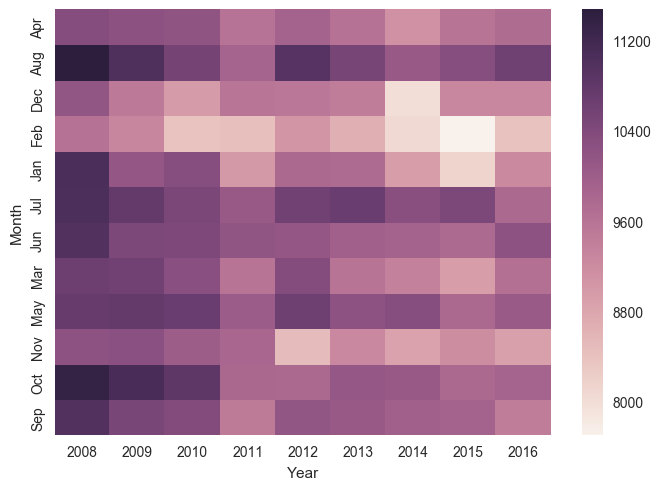

In [12]:
#HeatMap of Crime_Activity by year and month 
crime_activity_plot = pd.DataFrame(crimes.groupby(['Month','Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crime_activity_plot.head()
crime_activity_plot_2008_2015 = crime_activity_plot.pivot_table(values='Count',index='Month',columns='Year')
sns.heatmap(crime_activity_plot_2008_2015)
plt.show()

From the above matrixplot following observations were made:
2008 and 2009 had the highest crime activity in the 9 year period
Also, through out the time period, July and August had the highest crime activity

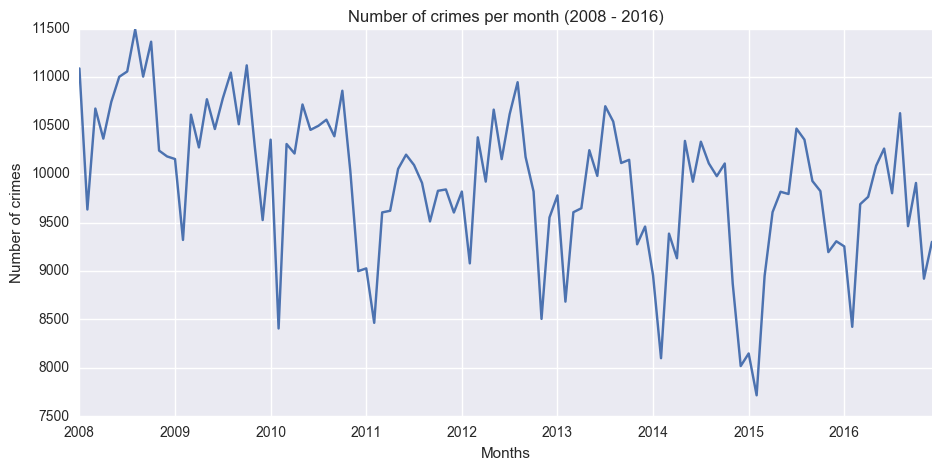

In [13]:
#Plot the monthly Crime timeline from 2008 - 2016
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2008 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

Above graph shows a clear "periodic" pattern in the monthly crimes over 9 years. Certainly many conclusions can be drawn from above graph. For example, the crime pattern shows decrease in crime around the end of each year and start of new year.

Crime is a very predictable activity!

How crime has changed over the years?
 
In a previous chart, we already looked at the number of monthly crime records. 

Here, we will look at the rolling sum of crimes of the past years. 
For each day, we calculate the sum of crimes of the past year. If this rolling sum is decreasing, then crime rates have been decreasing during that year. On the contrary, if the rolling sum stays the same during a given year, then it implies that crime rates stayed the same.

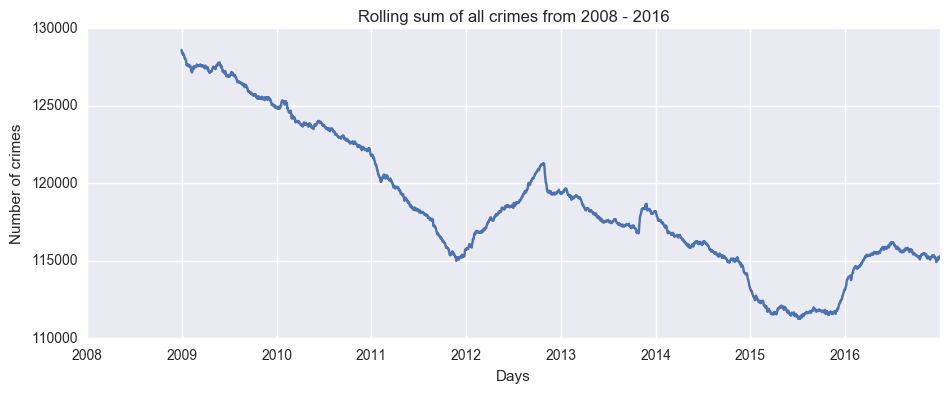

In [14]:
# Rolling Sum Plot
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2008 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

We can see that the crime rate decreased over years from 2009 to 2012 and 2013-2015. Unfortunately  it has increased during 2012 and 2016 calender years. 

But this is for total crimes.

## Lets explore the major crimes types and their frequencies over the timeline

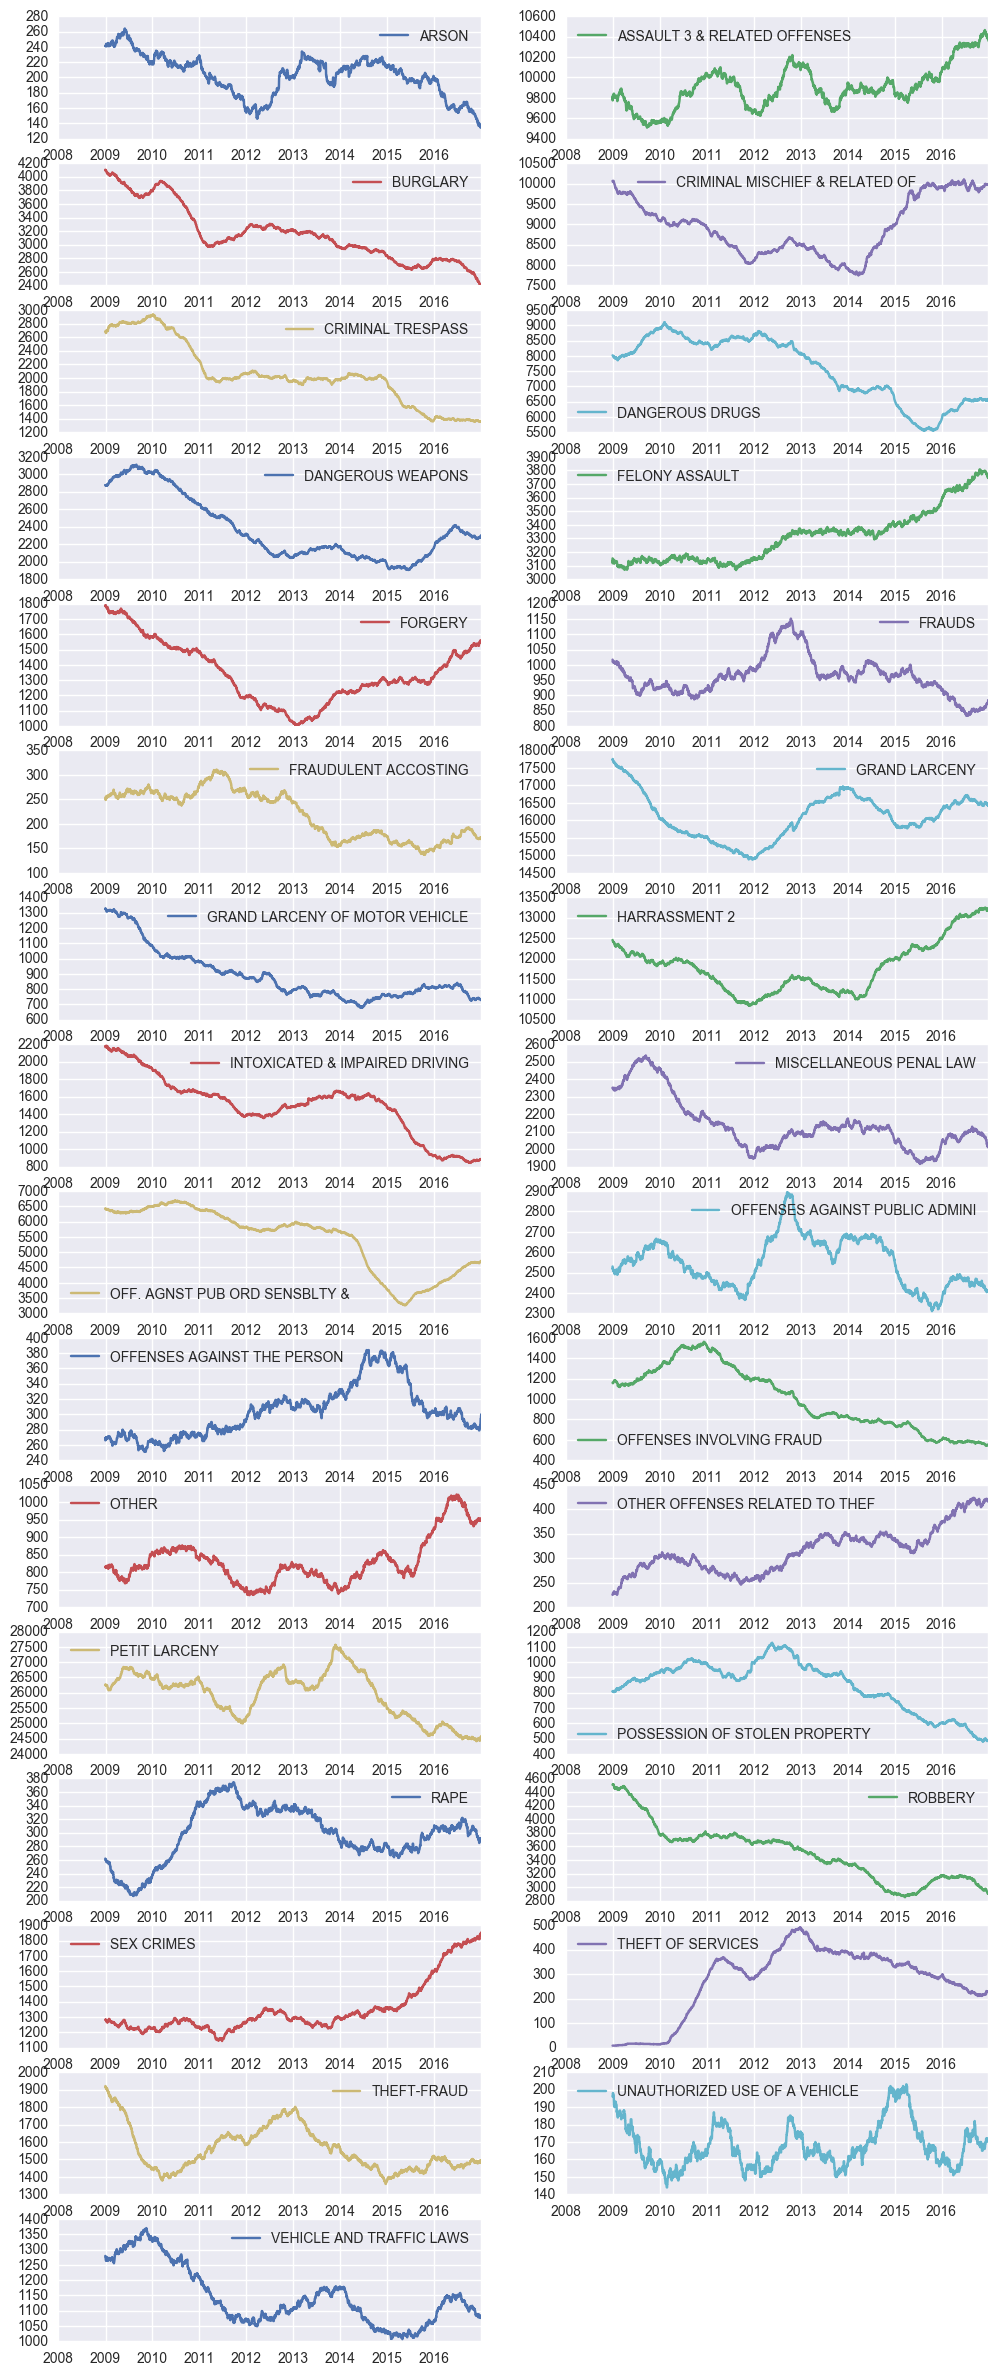

In [15]:
crimes_count_date = crimes.pivot_table('CMPLNT_NUM', aggfunc=np.size, columns='OFNS_DESC', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.show()

## Exploring crimes over the week days

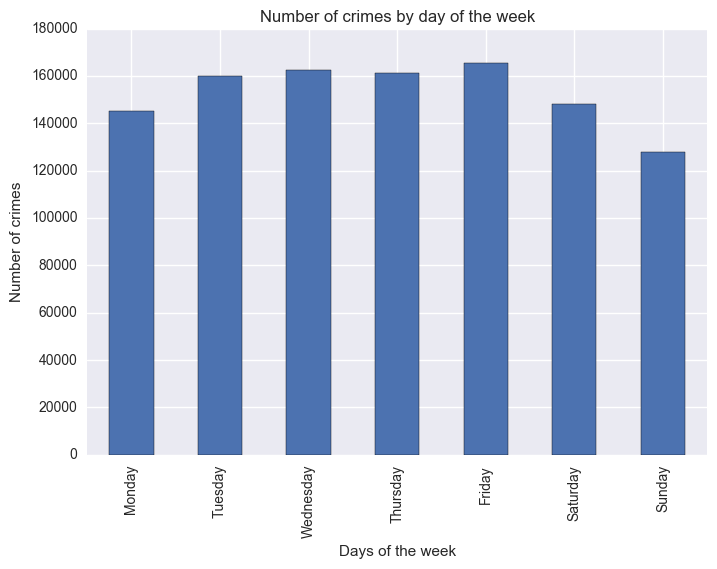

In [16]:
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xticks(np.arange(7), days)
plt.xlabel('Days of the week')
plt.title('Number of crimes by day of the week')
plt.show()

#### Also lets check for seasonality in crimes throughout the year(monthwise)

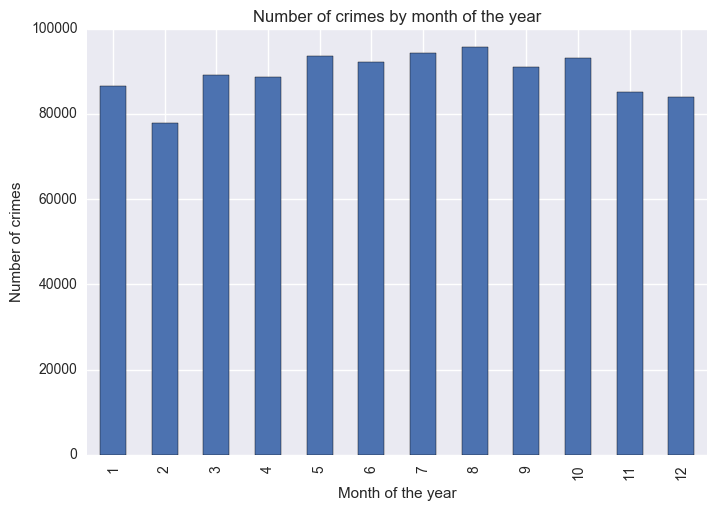

In [17]:
crimes.groupby([crimes.index.month]).size().plot(kind='bar')
plt.xlabel('Month of the year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

We know that all crimes are not the same. 
Few crime types are more likely to occur than others depending on the place and time.

In this section, we will see how crimes differ based on different locations and week days.


In [18]:
dayofweek_by_location = crimes.pivot_table(values='CMPLNT_NUM', index='PREM_TYP_DESC', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='CMPLNT_NUM', index='OFNS_DESC', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
months_by_type = crimes.pivot_table(values='CMPLNT_NUM', index='OFNS_DESC', columns=crimes.index.month, aggfunc=np.size).fillna(0)
location_by_type  = crimes.pivot_table(values='CMPLNT_NUM', index='PREM_TYP_DESC', columns='OFNS_DESC', aggfunc=np.size).fillna(0)

## Below plots are for exploring 
### 1. frequency of crimes occuring at different locations during different weekdays
### 2. types of crimes during weekdays
### 3. types of crimes during different months
### 4. types of crimes at different locations

In [19]:

from sklearn.cluster import AgglomerativeClustering as AC

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def scale_and_plot(df, ix = None, cmap = 'RdGy'):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix,cmap=cmap)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap,interpolation='nearest')
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

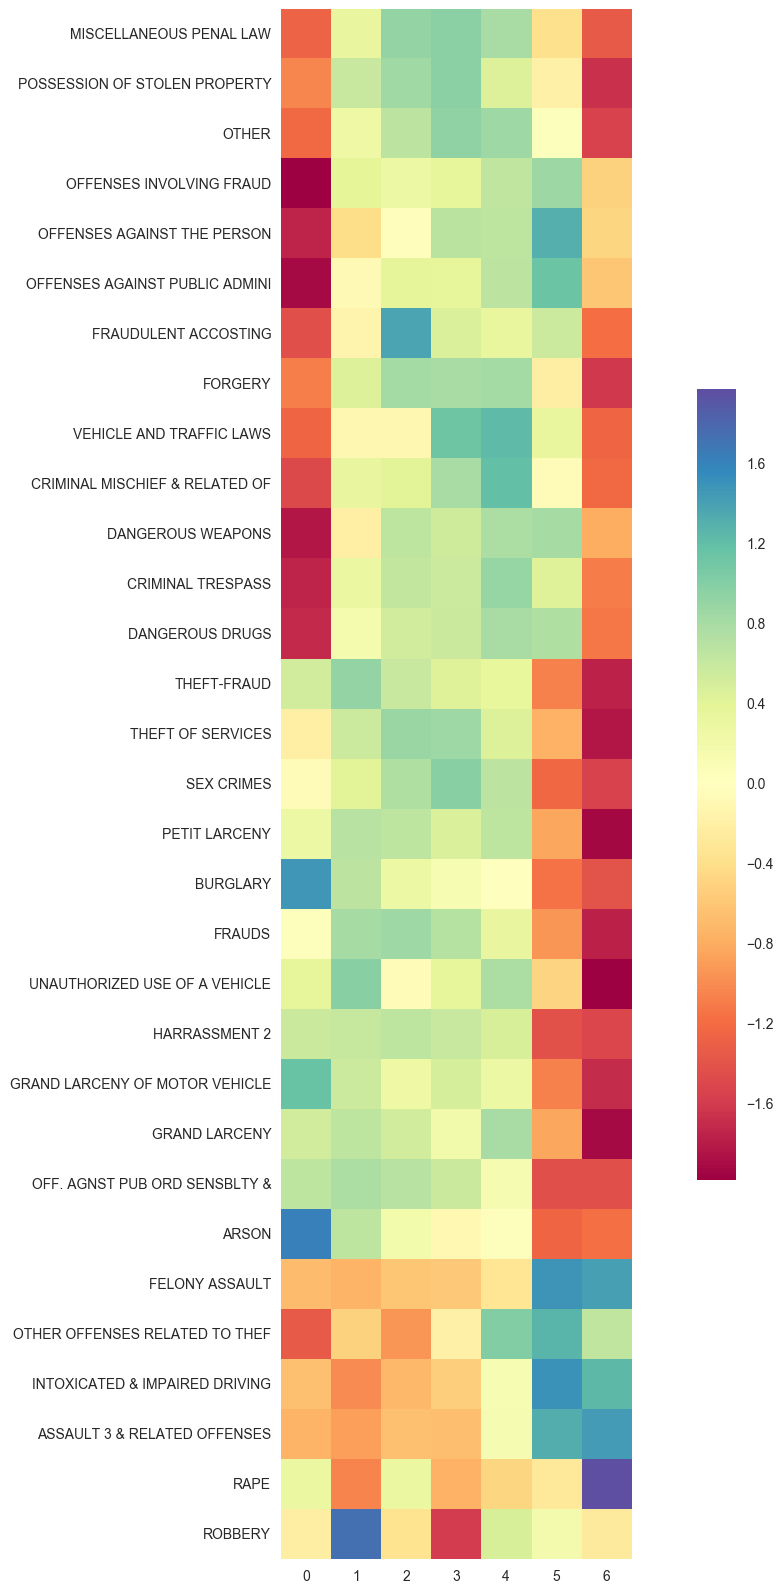

In [20]:
plt.figure(figsize=(17,20))
scale_and_plot(dayofweek_by_type,cmap='Spectral')

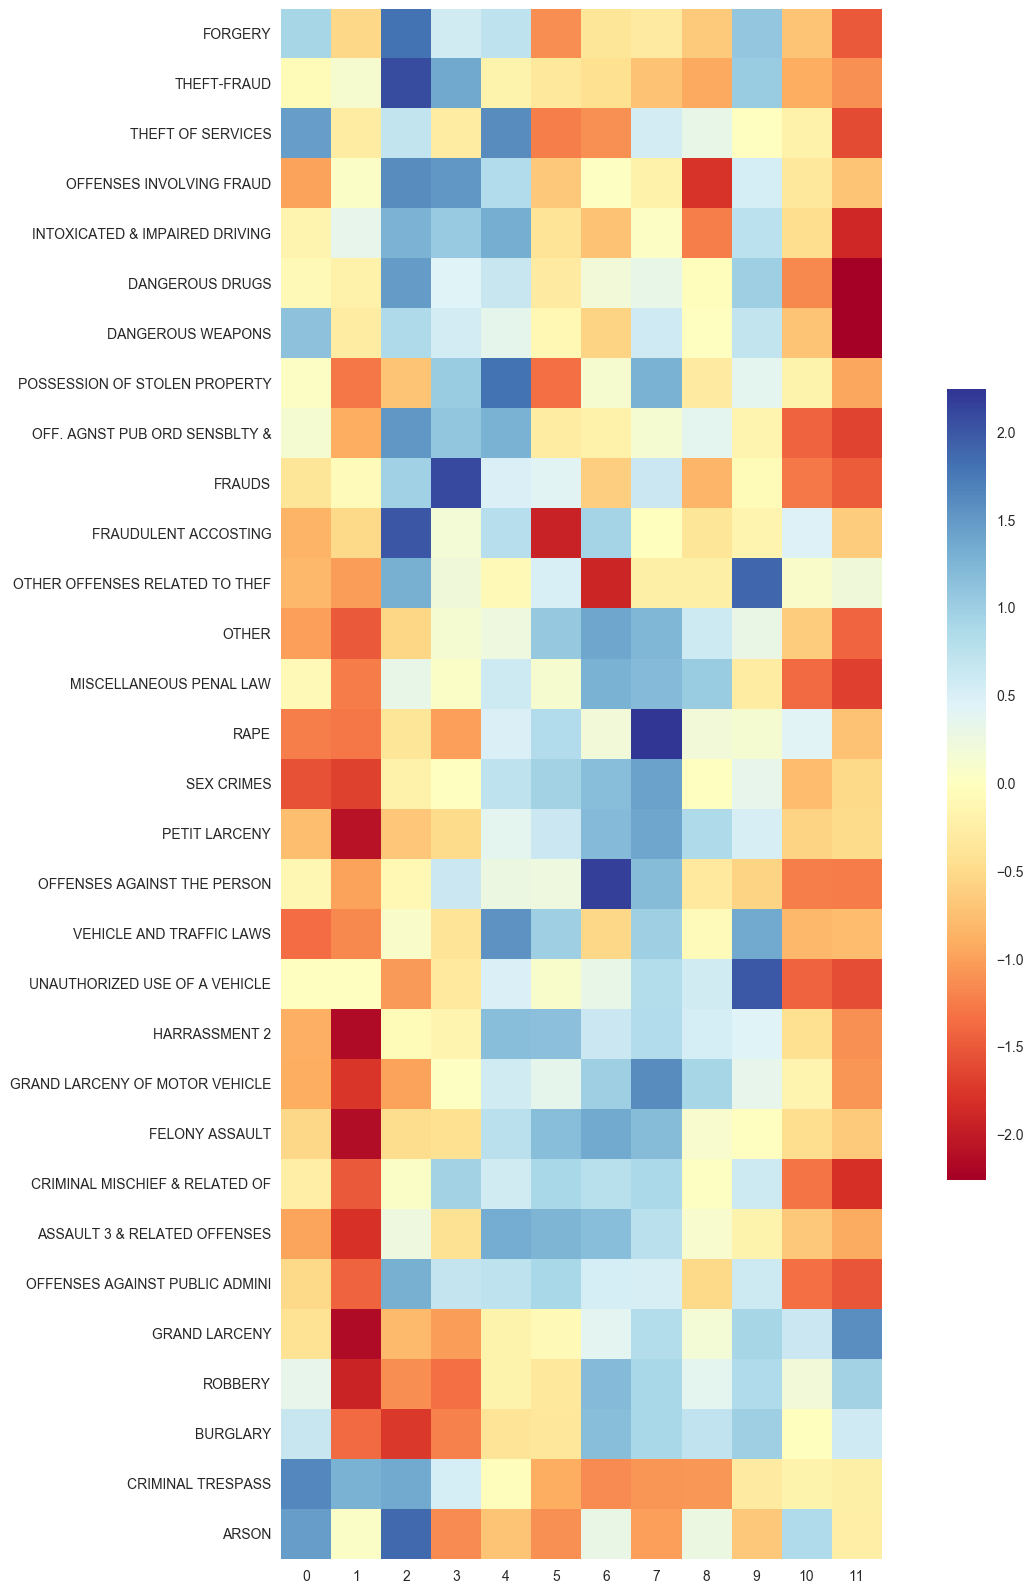

In [21]:
plt.figure(figsize=(17,20))
scale_and_plot(months_by_type,cmap='RdYlBu')

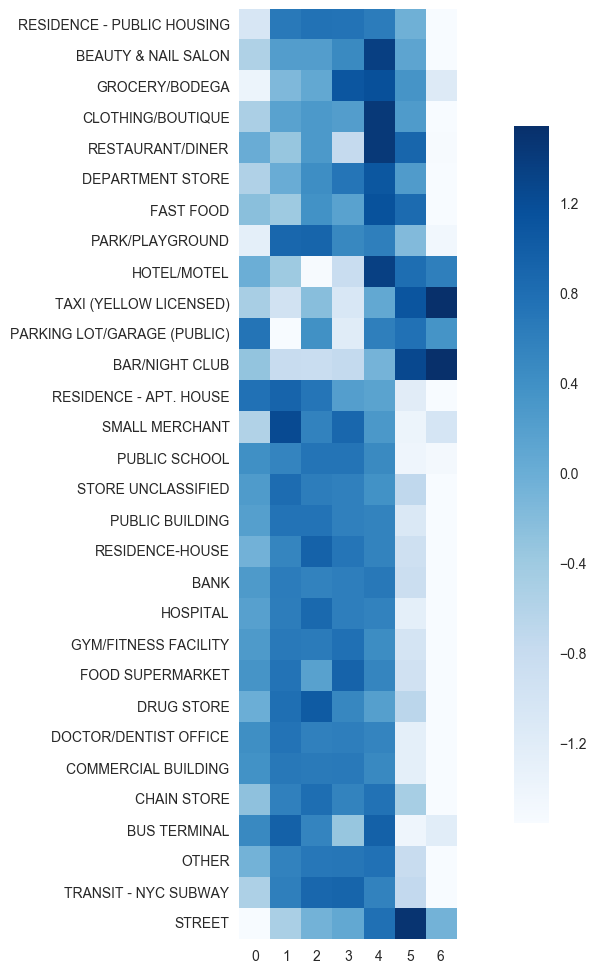

In [22]:
plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location,cmap='Blues')

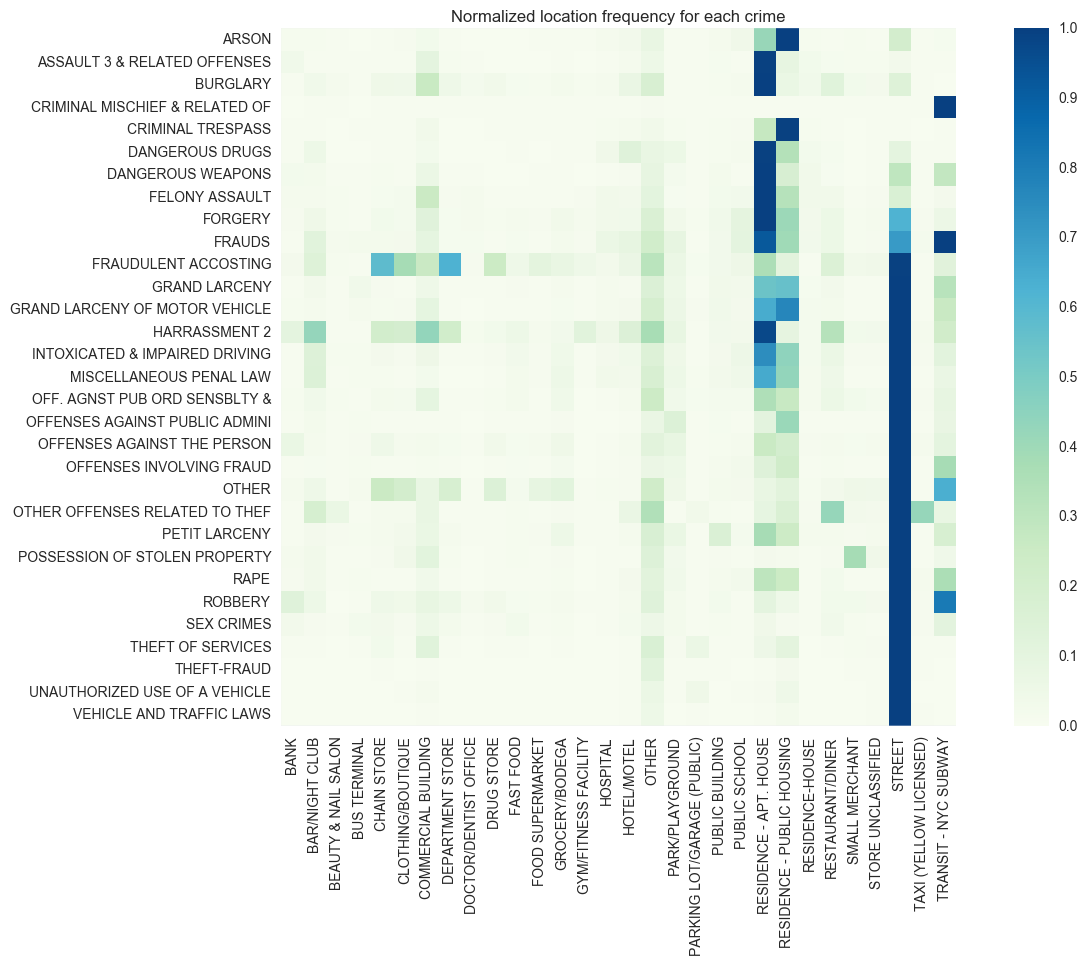

In [23]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(15,9))
plt.imshow(df.T.iloc[ix,:], cmap='GnBu',interpolation='none')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()